In [1]:
# plotting complex curves

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import numpy as np

In [3]:
def plot_me(fn_, Max=2*np.pi, resolution=200, show=True, c=None):
    if show:
        plt.figure(figsize=(4, 4))
        plt.xlim([-2, 2])
        plt.ylim([-2, 2])    
    
    if not type(fn_)==list: fn_=[fn_]
    for fn in fn_:
        R = [Max*t/resolution for t in range(resolution)]
        Y = [ fn(t).imag for t in R]
        X = [ fn(t).real for t in R]
        if resolution<30:
            # plt.scatter(X,Y, color='red')
            if c=='rainbow': plt.scatter(X,Y,color=[hsv_to_rgb((t/Max, 1,1)) for t in R])
            elif c: plt.scatter(X,Y,color=c)
            else: plt.scatter(X,Y)
        else:
            #plt.plot(X,Y, color='blue')
            if c=='rainbow': plt.plot(X,Y,color=[hsv_to_rgb((t/Max, 1,1)) for t in R])
            elif c: plt.plot(X,Y, color=c)
            else: plt.plot(X,Y)
    if show: plt.show()

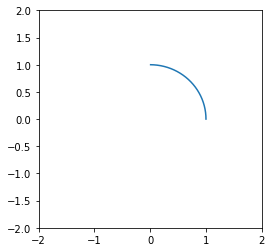

In [4]:
def n_circle_rotations(val):
    return np.exp(1j*2*np.pi*val)
plot_me([n_circle_rotations], Max=.25)

In [68]:
def angle_to_complex(val):
    return np.exp(1j*np.pi*val)
plot_me(angle_to_complex, Max=np.pi)

TypeError: 'float' object cannot be interpreted as an integer

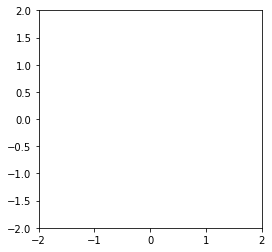

In [103]:
def wiggle(val):
    return np.exp(1j*np.pi*val) + np.random.rand(-.2,.2) + 1j*np.random.rand(-.2,.2)
plot_me(wiggle, Max=np.pi)

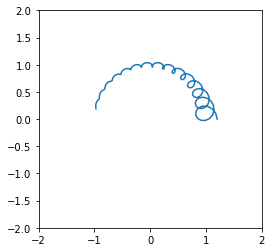

In [141]:
def angle_to_complex2(val):
    return np.exp(1j*np.pi*val)+.2*np.exp(val*1j*100)*np.e**(-val*np.pi)
#plot_me([angle_to_complex,angle_to_complex2],Max=np.pi)
plot_me([angle_to_complex2],Max=0.3*np.pi)

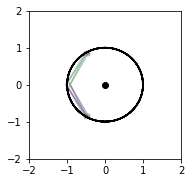

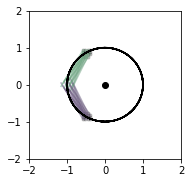

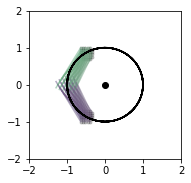

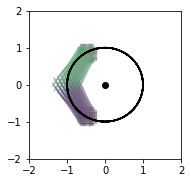

In [214]:
radii = [0.1, 0.2, 0.3, 0.4] 
div = 2
locus = (-1 + 0j)

for nth_radius, radius in enumerate(radii):
    nth = nth_radius//div + nth_radius%div
    
    plt.figure(figsize=(6, 6))
    plt.subplot(2 , 2,  nth+1)
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])   
    
    
    grid = np.linspace(-3,3,100)
    for r in grid:
        for i in grid:
            mapped = (r+1j*i)**1.5
            if abs(mapped - locus)>radius: continue
            _clr = ((float(r)-min(grid))/(max(grid)-min(grid)), 
                            (float(i)-min(grid))/(max(grid)-min(grid)), 0.5,0.5)
            #print(_clr)

            plt.scatter( [r],[i],color=(0,0,0,0.2), marker='.')
            plt.plot( [r, mapped.real], [i, mapped.imag],\
                      color=_clr)

    plot_me([angle_to_complex], show=None, c='black')
    plt.scatter( [0],[0],color='black')
    
    plt.show()

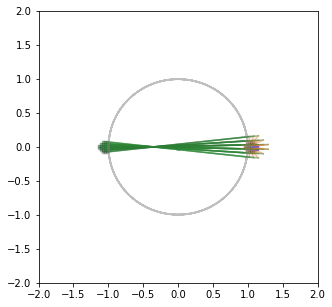

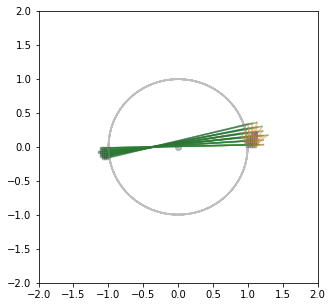

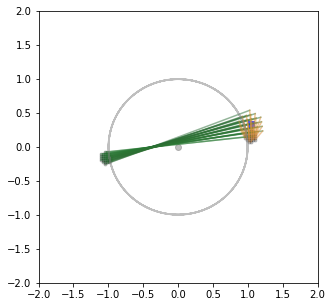

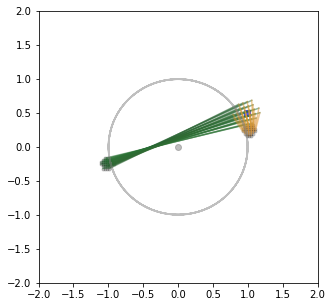

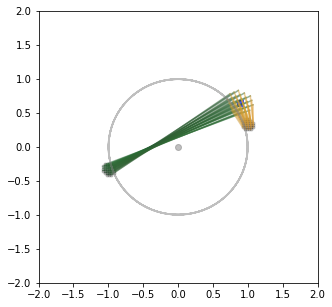

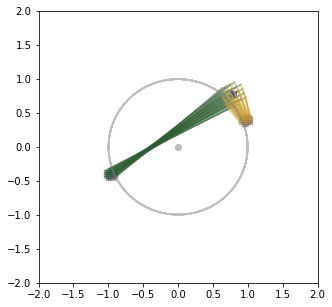

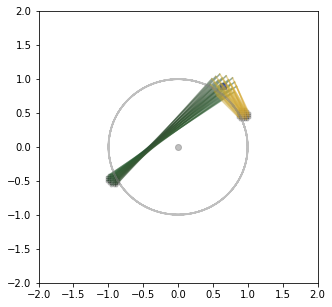

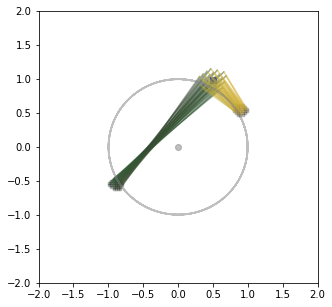

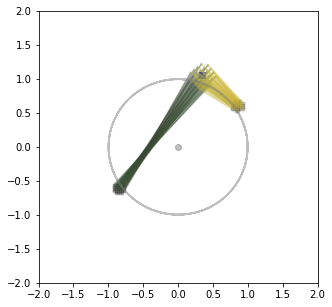

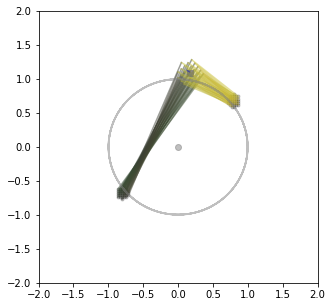

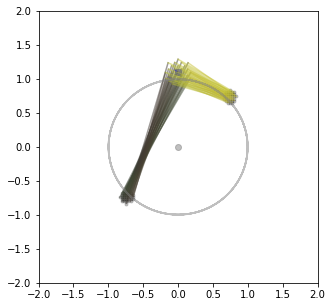

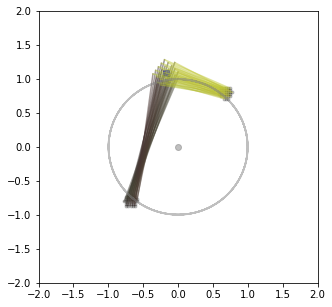

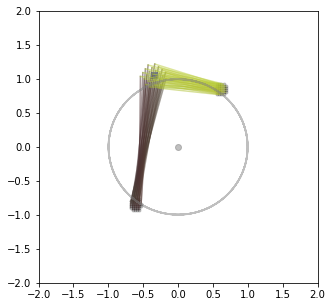

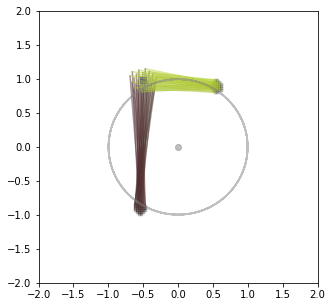

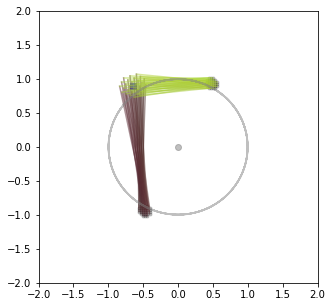

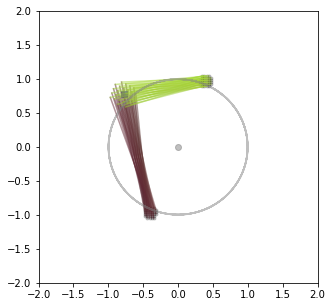

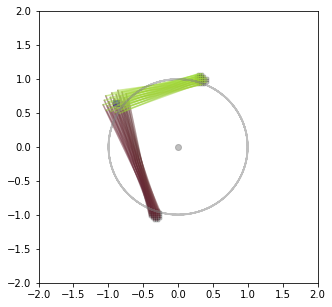

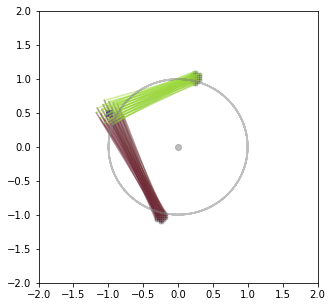

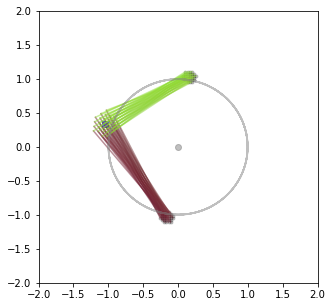

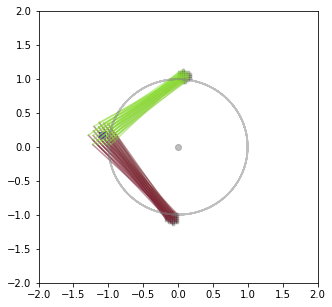

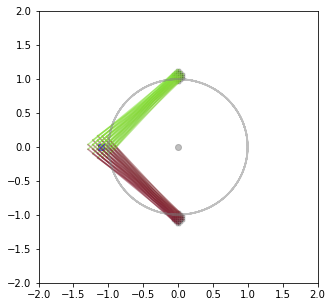

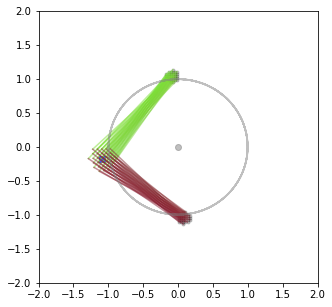

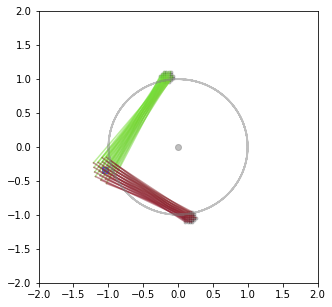

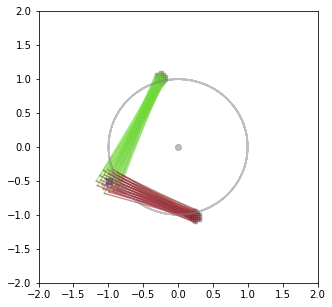

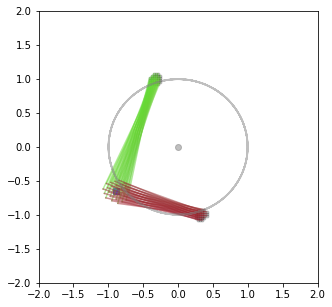

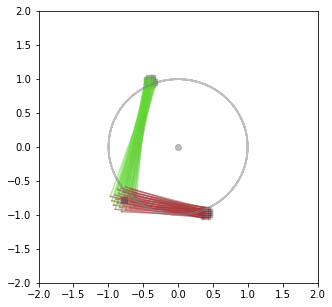

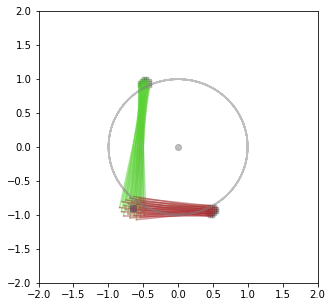

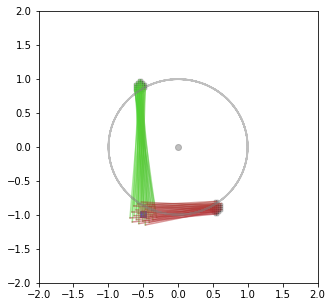

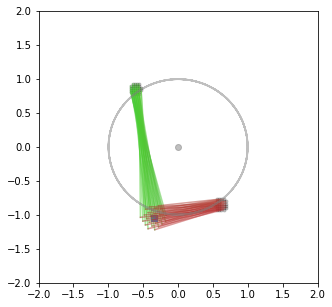

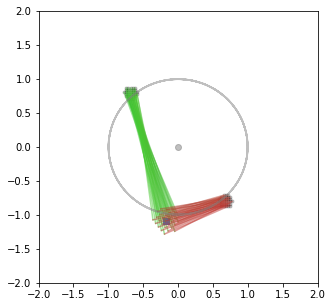

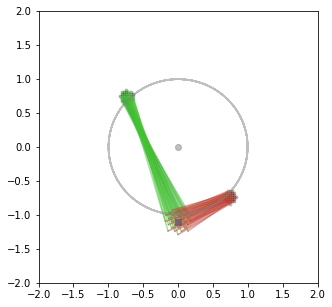

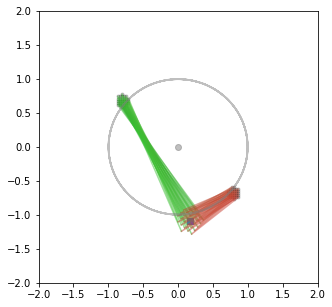

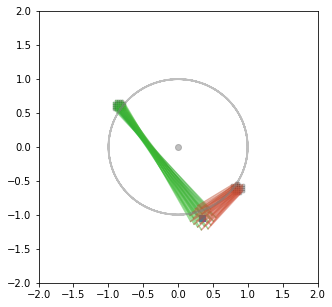

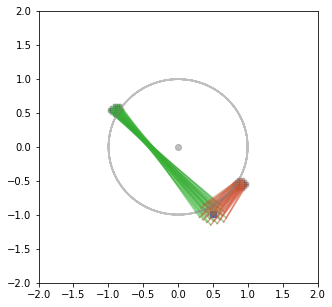

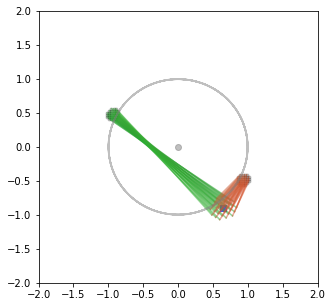

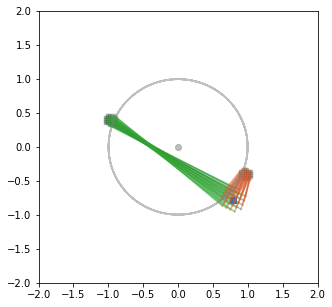

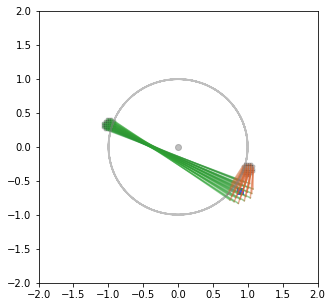

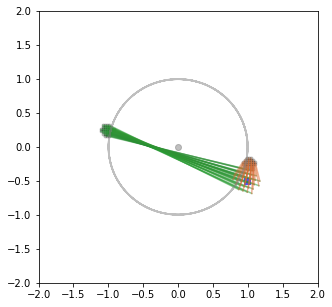

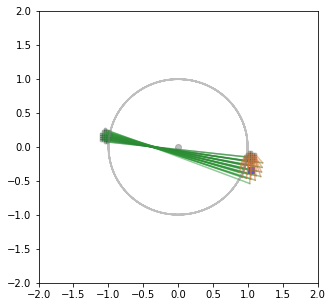

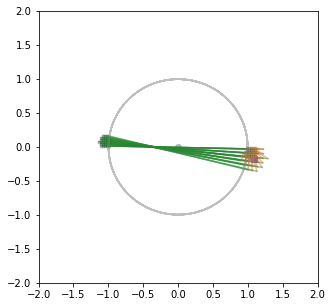

In [260]:
# given a radius and locus, plot the complex values whose func-image falls within 
# radius at that locus.

func = lambda x: x**1.5
func = lambda x: x**2
n = 40
resolution=100

params_sets = [ (0.2, np.exp(1j*2*np.pi*x/n + 0.1)) for x in range(n)]
# ^ radius, locus. 
    
#    (0.3, (-1 + 0j)),  (0.3, (0 + 1j)),  (0.3, (0 - 1j)),  (0.3, (1 + 0j)),  ]
div=int(len(params_sets)**0.5)


for nth_plot, (radius,locus) in enumerate(params_sets):
    nth = nth_radius//div + nth_radius%div
    
    plt.figure(figsize=(11, 11))
    plt.subplot(2 , 2,  nth+1)
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])   
    
    
    grid = np.linspace(-1.5,1.5,resolution)
    for r in grid:
        for i in grid:
            mapped = func(r+1j*i)
            if abs(mapped - locus)>radius: continue
            _clr = ((float(r)-min(grid))/(max(grid)-min(grid)), 
                            (float(i)-min(grid))/(max(grid)-min(grid)), 0.2,0.5)
            #print(_clr)

            plt.scatter( [r],[i],color=(0,0,0,0.2), marker='.')
            plt.plot( [r, mapped.real], [i, mapped.imag],\
                      color=_clr)

    plot_me([angle_to_complex], show=None, c=(0.5,0.5,0.5,0.5))
    plt.scatter( [0],[0],color=(0.5,0.5,0.5,0.5))
    plt.scatter( [locus.real],[locus.imag],color=(.3,.3,1,1), marker='s')
    
    plt.show()
plt.show()

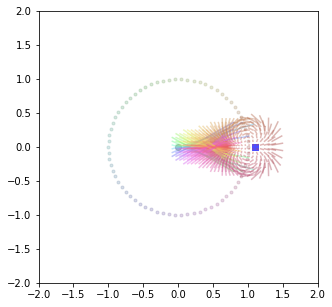

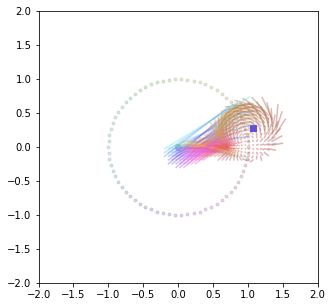

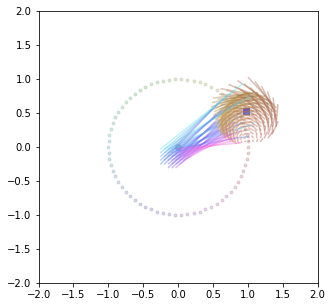

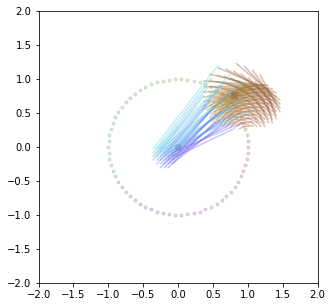

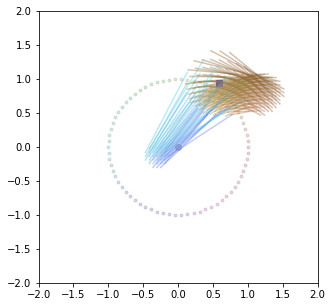

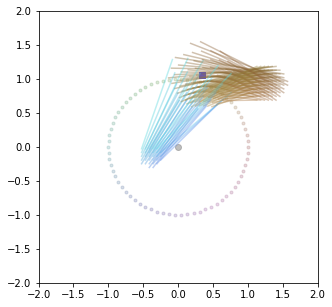

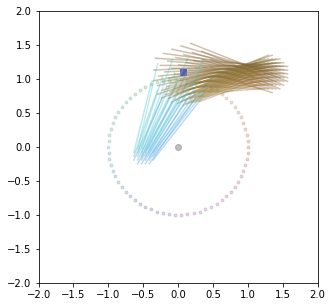

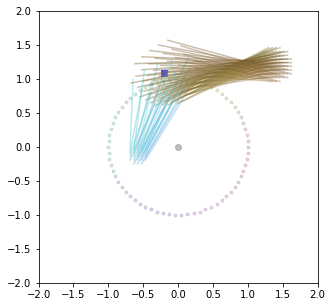

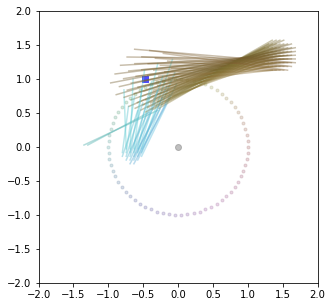

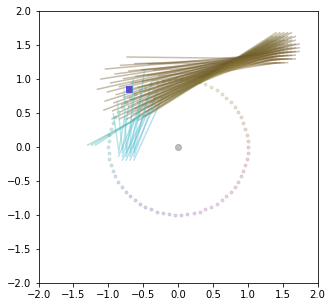

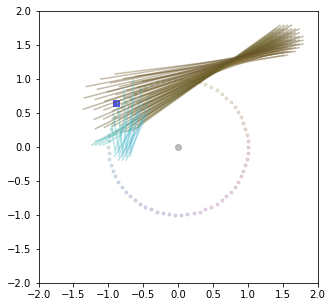

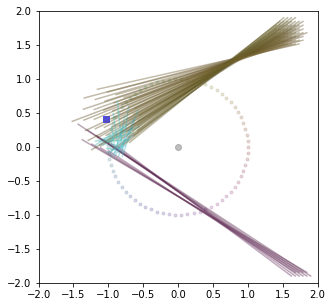

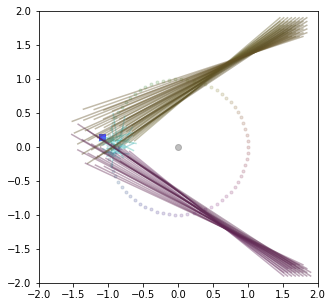

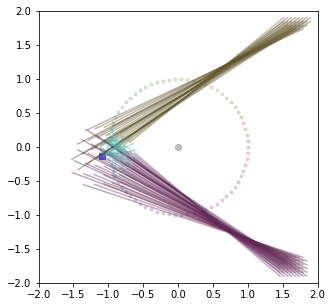

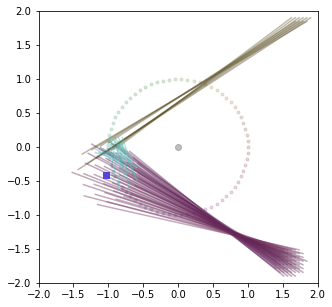

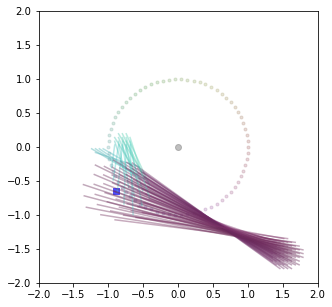

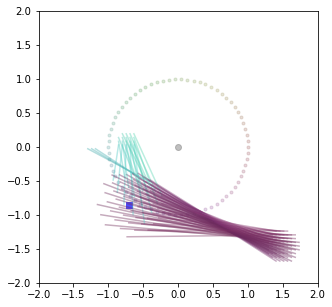

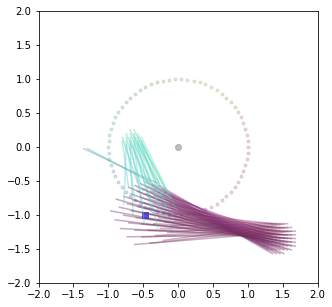

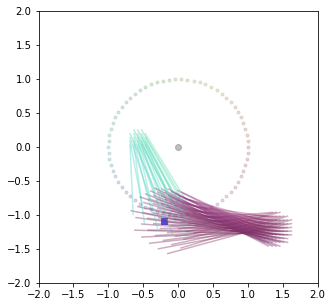

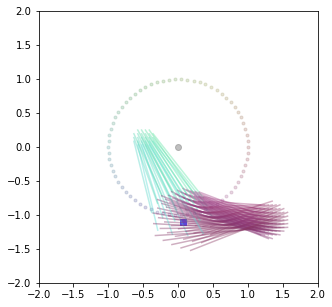

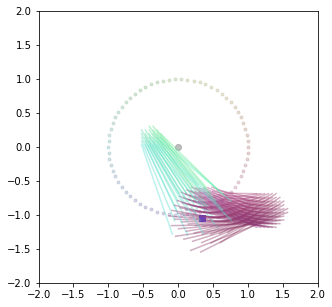

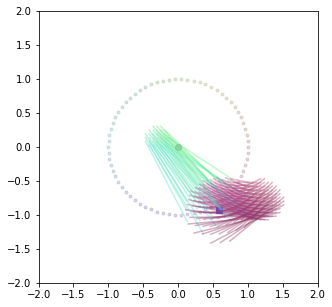

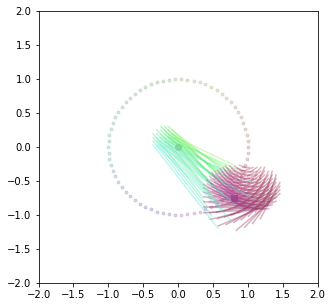

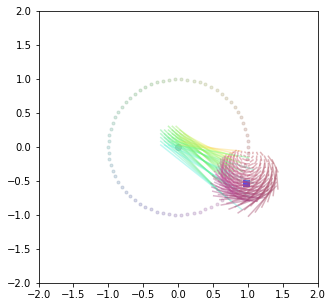

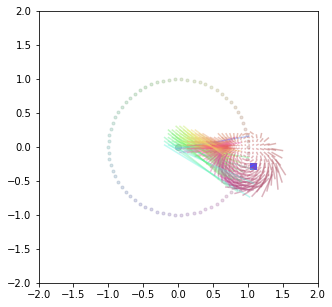

In [457]:
# given a radius and locus, plot the complex values whose func-image falls within 
# radius at that locus.

func = lambda x: x**1.5
func = lambda x: x**2
func = lambda x: x**x
n = 25
resolution=70

params_sets = [ (0.5, np.exp(1j*2*np.pi*x/n + 0.1)) for x in range(n)]
# ^ radius, locus. 
div=int(len(params_sets)**0.5)



for nth_plot, (radius,locus) in enumerate(params_sets):
    nth = nth_radius//div + nth_radius%div
    
    plt.figure(figsize=(11, 11))
    plt.subplot(2 , 2,  nth+1)
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])   
    
    
    grid1 = np.linspace(-1.9,1.9,resolution)
    grid2 = np.linspace(-1.9,1.9,resolution)
    
    
    
    for r in np.random.permutation(grid1):
        for i in np.random.permutation(grid2):
            mapped = func(r+1j*i)
            if abs(mapped - locus)>radius: continue
#             _clr = ((float(r)-min(grid))/(max(grid)-min(grid)), 
#                            (float(i)-min(grid))/(max(grid)-min(grid)), 0.2,0.5)

            angle = (np.angle( (r+i*1j) )/(2*np.pi))
#             angle=np.arctan2(r,i)
            _clr = hsv_to_rgb( ((angle)%1, .6,min(0.99, 1-abs(r+i*1j)/4)) )
            _clr = (_clr[0], _clr[1], _clr[2], 0.4)
#             print(r,i,angle, _clr)
            plt.plot( [r, mapped.real], [i, mapped.imag], color=_clr)

            
            
            #input()
            #plt.scatter( [r],[i],color=(0,0,0,0.2), marker='.')
            
            


    for t in range(resolution):
        # plot a color circle
        xy=[np.sin(t*1.8*np.pi/resolution).real],[np.cos(t*1.8*np.pi/resolution)]
        c = hsv_to_rgb( (t/float(resolution),0.3,.7))
        c = (c[0],c[1],c[2],0.3)
        #plt.scatter([np.exp(1j*t*2*np.pi/resolution).real], [np.exp(1j*t*2*np.pi/resolution).imag],
        plt.scatter([np.exp(1j*t*2*np.pi/resolution).real], [np.exp(1j*t*2*np.pi/resolution).imag],
                   color=c, marker='.')
        
        
        continue
        xy=[np.cos(t*1.8*np.pi/resolution)],[np.sin(t*1.8*np.pi/resolution)]
        #plt.scatter([xy[0]], [xy[1]], 
        plt.scatter([xy[0]], [xy[1]], 
                   color=hsv_to_rgb( (t/float(resolution),0.7,0.7)))
        
        
    #plot_me([angle_to_complex], show=None, c='rainbow')
    plt.scatter( [0],[0],color=(0.5,0.5,0.5,0.5))
    plt.scatter( [locus.real],[locus.imag],color=(.3,.3,1,1), marker='s')
    
    plt.show()

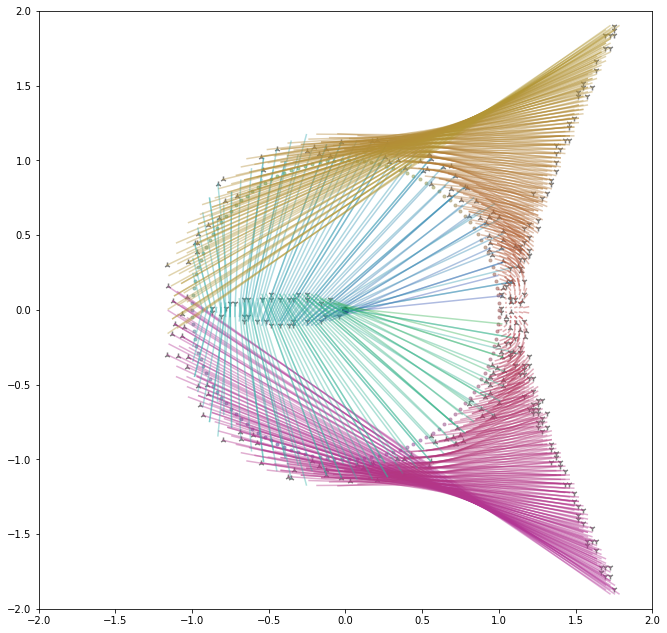

In [478]:
# given a radius and locus, plot the complex values whose func-image falls within 
# radius at that locus.

func = lambda x: x**x
n = 50
resolution=130
window_width = 2
value_width = 1.9


params_sets = [ (0.1, np.exp(1j*2*np.pi*x/n + 0.1)) for x in range(n)]
# ^ radius, locus. 


plt.figure(figsize=(11, 11))
plt.xlim([-window_width, window_width])
plt.ylim([-window_width, window_width])   

for (radius,locus) in params_sets:    
    grid1 = np.linspace(-value_width,value_width,resolution)
    grid2 = np.linspace(-value_width,value_width,resolution)
    for r in np.random.permutation(grid1):
        for i in np.random.permutation(grid2):
            mapped = func(r+1j*i)
            if abs(mapped - locus)>radius: continue
            angle = (np.angle( (r+i*1j) )/(2*np.pi))
#             _clr = hsv_to_rgb( ((angle)%1, .6,min(0.99, 1-abs(r+i*1j)/4)) )
            _clr = hsv_to_rgb( ((angle)%1, 0.7, 0.7) )
            _clr = (_clr[0], _clr[1], _clr[2], 0.4)
            plt.plot( [r, mapped.real], [i, mapped.imag], color=_clr)
            if np.random.rand()<0.2: plt.scatter([r],[i],color=(.5,.5,.5,1), marker='1')
            if np.random.rand()<0.2: plt.scatter([mapped.real],[mapped.imag],color=(.5,.5,.5,1), marker='2')

for t in range(resolution):
    xy=[np.sin(t*1.8*np.pi/resolution).real],[np.cos(t*1.8*np.pi/resolution)]
    c = hsv_to_rgb( (t/float(resolution),0.3,.7))
    c = (c[0],c[1],c[2],1-0.3)
    #plt.scatter([np.exp(1j*t*2*np.pi/resolution).real], [np.exp(1j*t*2*np.pi/resolution).imag],
    plt.scatter([np.exp(1j*t*2*np.pi/resolution).real], [np.exp(1j*t*2*np.pi/resolution).imag],
               color=c, marker='.')

#plot_me([angle_to_complex], show=None, c='rainbow')
plt.scatter( [0],[0],color='black')

plt.show()

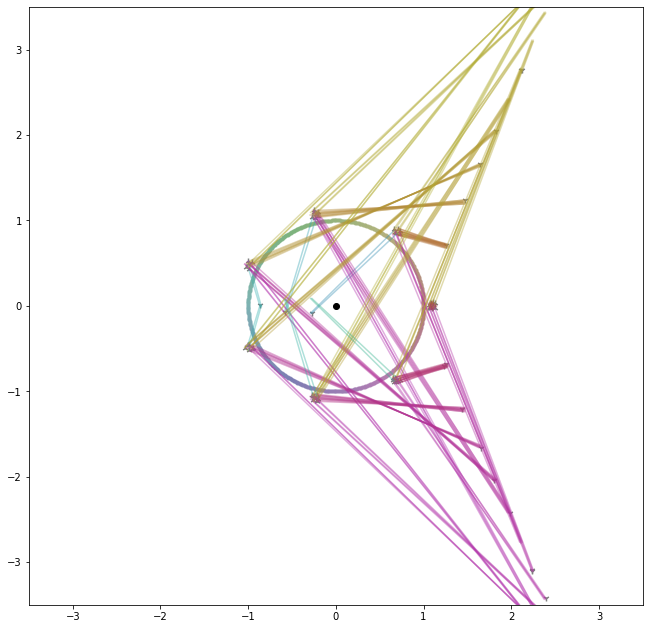

In [487]:
# given a radius and locus, plot the complex values whose func-image falls within 
# radius at that locus.

func = lambda x: x**x
n = 7
resolution=630
window_width = 3.5
value_width = 4.9


params_sets = [ (0.05, np.exp(1j*2*np.pi*x/n + 0.1)) for x in range(n)]
# ^ radius, locus. 


plt.figure(figsize=(11, 11))
plt.xlim([-window_width, window_width])
plt.ylim([-window_width, window_width])   

for (radius,locus) in params_sets:    
    grid1 = np.linspace(-value_width,value_width,resolution)
    grid2 = np.linspace(-value_width,value_width,resolution)
    for r in np.random.permutation(grid1):
        for i in np.random.permutation(grid2):
            mapped = func(r+1j*i)
            if abs(mapped - locus)>radius: continue
            angle = (np.angle( (r+i*1j) )/(2*np.pi))
#             _clr = hsv_to_rgb( ((angle)%1, .6,min(0.99, 1-abs(r+i*1j)/4)) )
            _clr = hsv_to_rgb( ((angle)%1, 0.7, 0.7) )
            _clr = (_clr[0], _clr[1], _clr[2], 0.4)
            plt.plot( [r, mapped.real], [i, mapped.imag], color=_clr)
            if np.random.rand()<0.2: plt.scatter([r],[i],color=(.5,.5,.5,1), marker='1')
            if np.random.rand()<0.2: plt.scatter([mapped.real],[mapped.imag],color=(.5,.5,.5,1), marker='2')

for t in range(resolution):
    xy=[np.sin(t*1.8*np.pi/resolution).real],[np.cos(t*1.8*np.pi/resolution)]
    c = hsv_to_rgb( (t/float(resolution),0.3,.7))
    c = (c[0],c[1],c[2],1-0.3)
    #plt.scatter([np.exp(1j*t*2*np.pi/resolution).real], [np.exp(1j*t*2*np.pi/resolution).imag],
    plt.scatter([np.exp(1j*t*2*np.pi/resolution).real], [np.exp(1j*t*2*np.pi/resolution).imag],
               color=c, marker='.')

#plot_me([angle_to_complex], show=None, c='rainbow')
plt.scatter( [0],[0],color='black')

plt.show()

In [ ]:

funcs = [ lambda x: x**(3) ]
n = 23
resolution=80
window_width = 1.5
value_width = 1.9


params_sets = [ (0.6, np.exp(1j*2*np.pi*x/n + 0.1)) for x in range(n)]


In [ ]:

funcs = [ lambda x: np.log(x+0j)]
n = 23
resolution=80
window_width = 1.5
value_width = 1.9

params_sets = [ (0.6, np.exp(1j*2*np.pi*x/n + 0.1)) for x in range(n)]


In [ ]:
# given a radius and locus, plot the complex values whose func-image falls within 
# radius at that locus.

funcs = [ lambda x: np.log(np.log(x+0j))]
n = 23
resolution=80
window_width = 10.5
value_width = 11.9


params_sets = [ (0.4, np.exp(1j*2*np.pi*x/n + 0.1)) for x in range(n)]
# ^ radius, locus. 

In [ ]:
funcs = [ lambda x: np.log(x+0j)*x]
n = 23
resolution=80
window_width = 2.0
value_width = 1.9


params_sets = [ (0.4, np.exp(1j*2*np.pi*x/n + 0.1)) for x in range(n)]


In [ ]:
# given a radius and locus, plot the complex values whose func-image falls within 
# radius at that locus.

funcs = [ lambda x: np.exp(x)]
n = 43
resolution=120
window_width = 4
value_width = 3.8
params_sets = [ (0.05, np.exp(1j*x)) for x in np.random.uniform(0,2*np.pi,2*n)]


In [ ]:
# given a radius and locus, plot the complex values whose func-image falls within 
# radius at that locus.

funcs = [ lambda x: np.exp(0j+np.exp(x+0j))]
n = 23
resolution=80
window_width = 2.0
value_width = 1.9
params_sets = [ (0.1, np.exp(1j*2*np.pi*x/n + 0.1)) for x in range(n)]
# ^ radius, locus. 


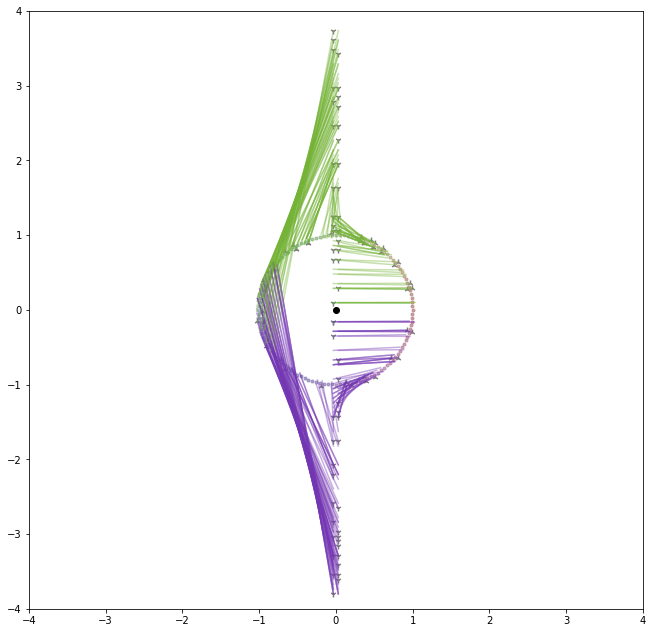

In [542]:
# given a radius and locus, plot the complex values whose func-image falls within 
# radius at that locus.

funcs = [ lambda x: np.exp(x)]
n = 43
resolution=120
window_width = 4
value_width = 3.8
params_sets = [ (0.05, np.exp(1j*x)) for x in np.random.uniform(0,2*np.pi,2*n)]

# ^ radius, locus. 


plt.figure(figsize=(11, 11))
plt.xlim([-window_width, window_width])
plt.ylim([-window_width, window_width])   

for (radius,locus) in params_sets:    
    grid1 = np.linspace(-value_width,value_width,resolution)
    grid2 = np.linspace(-value_width,value_width,resolution)
    for r in np.random.permutation(grid1):
        for i in np.random.permutation(grid2):
            
#             i += np.random.uniform(-resolution/10000, resolution/10000)
#             r += np.random.uniform(-resolution/10000, resolution/10000)
            for func in funcs:
                mapped = func(r+1j*i)
                if abs(mapped - locus)>radius: continue
                angle = (np.angle( (r+i*1j) )/(2*np.pi))
    #             _clr = hsv_to_rgb( ((angle)%1, .6,min(0.99, 1-abs(r+i*1j)/4)) )
                _clr = hsv_to_rgb( ((angle)%1, 0.7, 0.7) )
                _clr = (_clr[0], _clr[1], _clr[2], 0.4)
                plt.plot( [r, mapped.real], [i, mapped.imag], color=_clr)
                if np.random.rand()<0.2: plt.scatter([r],[i],color=(.5,.5,.5,1), marker='1')
                if np.random.rand()<0.2: plt.scatter([mapped.real],[mapped.imag],color=(.5,.5,.5,1), marker='2')

for t in range(resolution):
    xy=[np.sin(t*1.8*np.pi/resolution).real],[np.cos(t*1.8*np.pi/resolution)]
    c = hsv_to_rgb( (t/float(resolution),0.3,.7))
    c = (c[0],c[1],c[2],1-0.3)
    #plt.scatter([np.exp(1j*t*2*np.pi/resolution).real], [np.exp(1j*t*2*np.pi/resolution).imag],
    plt.scatter([np.exp(1j*t*2*np.pi/resolution).real], [np.exp(1j*t*2*np.pi/resolution).imag],
               color=c, marker='.')

#plot_me([angle_to_complex], show=None, c='rainbow')
plt.scatter( [0],[0],color='black')

plt.show()

In [532]:
np.random.uniform(-1,1,22)


array([ 0.67092554, -0.38405783,  0.61274123, -0.96390402, -0.88645299,
       -0.5205667 , -0.8948146 , -0.99186452, -0.01910558,  0.24254479,
        0.99288881, -0.40748129,  0.09022262, -0.24258481, -0.82686465,
       -0.25789945,  0.93696832, -0.74232686, -0.96120104,  0.43478966,
        0.89326841, -0.39848649])

tri-up symbol is source. tri-down symbol is dest. https://matplotlib.org/stable/api/markers_api.html

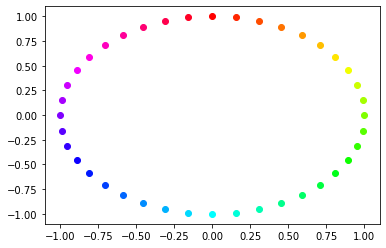

In [342]:
resolution=40
for t in range(resolution):
    xy=[np.sin(t*2*np.pi/resolution).real],[np.cos(t*2*np.pi/resolution)]
    #print(xy)
    plt.scatter([xy[0]], [xy[1]], 
                   color=hsv_to_rgb( (t/float(resolution),1,1)))
        
plt.show()

In [289]:
V, H = np.mgrid[0:1:100j, 0:1:300j]
hsv_to_rgb
S = np.ones_like(V)
HSV = np.dstack((H,S,V))
HSV[:2,:2,:], HSV[-2:,:2,:], HSV[-2:,-2:,:], HSV[:2,-2:,:]
np.mgrid[0:1:4j, 0:1:5j]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333],
        [0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667],
        [1.        , 1.        , 1.        , 1.        , 1.        ]],

       [[0.        , 0.25      , 0.5       , 0.75      , 1.        ],
        [0.        , 0.25      , 0.5       , 0.75      , 1.        ],
        [0.        , 0.25      , 0.5       , 0.75      , 1.        ],
        [0.        , 0.25      , 0.5       , 0.75      , 1.        ]]])

# depr below

In [263]:
plt.hsv()

<Figure size 432x288 with 0 Axes>

In [259]:
#help(plt.scatter)
help(plt.colormaps)

Help on function colormaps in module matplotlib.pyplot:

colormaps()
    Matplotlib provides a number of colormaps, and others can be added using
    :func:`~matplotlib.cm.register_cmap`.  This function documents the built-in
    colormaps, and will also return a list of all registered colormaps if
    called.
    
    You can set the colormap for an image, pcolor, scatter, etc,
    using a keyword argument::
    
      imshow(X, cmap=cm.hot)
    
    or using the :func:`set_cmap` function::
    
      imshow(X)
      pyplot.set_cmap('hot')
      pyplot.set_cmap('jet')
    
    In interactive mode, :func:`set_cmap` will update the colormap post-hoc,
    allowing you to see which one works best for your data.
    
    All built-in colormaps can be reversed by appending ``_r``: For instance,
    ``gray_r`` is the reverse of ``gray``.
    
    There are several common color schemes used in visualization:
    
    Sequential schemes
      for unipolar data that progresses from low to high


In [202]:
def plot_me(real_list, imag_list):
   # cnums = np.arange(5) + 1j * np.arange(6,11)
    X = [x.real for x in cnums]
    Y = [x.imag for x in cnums]
    
    R = list(range(100))
    [2*np.pi*t/len(R) for t in R]
    plt.plot(X,Y)
    plt.show()
    return
    circ = plt.Circle((0, 0), radius=1, edgecolor='b', facecolor='None')
    ax.add_patch(circ)
    plt.show()
    return
    
    plt.scatter(real_list,imag_list, color='red')
    plt.show()
    

In [ ]:
plt.figure(figsize=(6, 6))
plt.xlim([-2, 2])
plt.ylim([-2, 2])    

grid = np.linspace(-3,3,100)
for r in grid:
    for i in grid:
        mapped = (r+1j*i)**1.5
        if abs(mapped + 1)>0.2:
            continue
        plt.scatter( [r],[i],color=(0,0,0,0.2), marker='.')

        _clr = ((float(r)-min(grid))/(max(grid)-min(grid)), 
                        (float(i)-min(grid))/(max(grid)-min(grid)), 0.5,0.5)
        #print(_clr)
        plt.plot( [r, mapped.real], [i, mapped.imag],\
                  color=_clr)

#plot_me([angle_to_complex], show=None, c='black')
#plt.scatter( [0],[0],color='black')
plt.show()

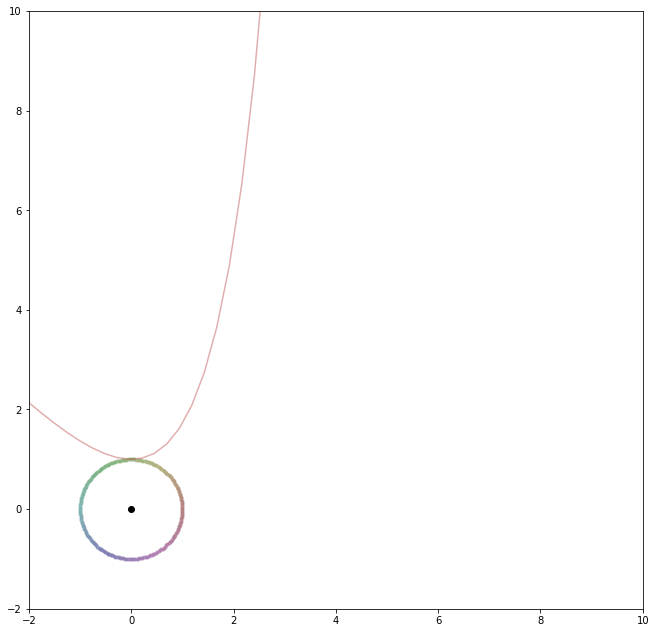

In [558]:
# given a radius and locus, plot the complex values whose func-image falls within 
# radius at that locus.

def power_series_01(x, N=20):
    y=0
    for n in range(N):
        y += (x/n)**n
    return y
    
    
funcs =[
#         lambda x: np.exp(x), 
#         lambda x:x,
#         power_series_01,
        lambda x: np.exp(x)-x,
        
        ]
#           lambda x: np.exp(x)**0.3*x**0.7, 
#           lambda x: np.exp(x)**0.3+x**0.7, 
#           lambda x: np.exp(x)*0.3+x*0.7,        
        
window_width = 10
window_width_low = -2
value_width = window_width#3.8
value_width_low = -2
resolution = 20*window_width#120
params_sets = [ (0.05, np.exp(1j*x)) for x in np.random.uniform(0,2*np.pi,resolution)]

plt.figure(figsize=(11, 11))
plt.xlim([window_width_low, window_width])
plt.ylim([window_width_low, window_width])   

values=np.linspace(value_width_low, value_width)
for fi, fn in enumerate(funcs): 
    _clr = hsv_to_rgb(( float(fi)/len(funcs), 0.7, 0.7) )
    _clr = (_clr[0], _clr[1], _clr[2], 0.4)
    plt.plot(values, [fn(v) for v in values], color=_clr)
               
for t in range(resolution):
    xy=[np.sin(t*1.8*np.pi/resolution).real],[np.cos(t*1.8*np.pi/resolution)]
    c = hsv_to_rgb( (t/float(resolution),0.3,.7))
    c = (c[0],c[1],c[2],1-0.3)
    #plt.scatter([np.exp(1j*t*2*np.pi/resolution).real], [np.exp(1j*t*2*np.pi/resolution).imag],
    plt.scatter([np.exp(1j*t*2*np.pi/resolution).real], [np.exp(1j*t*2*np.pi/resolution).imag],
               color=c, marker='.')

#plot_me([angle_to_complex], show=None, c='rainbow')
plt.scatter( [0],[0],color='black')

plt.show()

In [14]:
# 4.26.2021
import numpy as np
from matplotlib import pyplot as plt

In [12]:
np.log(np.log(np.log(np.log(np.log(np.log(np.log(np.log(np.log(np.log(np.log(np.log(\
                        np.log(np.log(np.log(np.log(.5+.5j))))))))))))))))

(0.31315133746958823+1.3427283343535517j)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


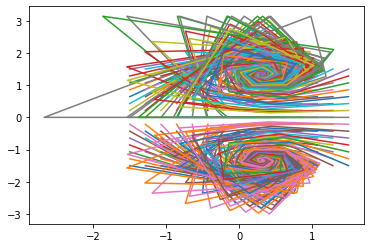

(0.33038002159918106+1.3311154499827078j) 0.030825684139818343


In [50]:
plt.clf()
l=[]
for xi in np.linspace(-1.5,1.5,15):
    for yi in np.linspace(-1.5,1.5,15):
        l += [[xi + yi*1j]]
        for _ in range(30):
            l[-1] += [np.log(l[-1][-1])]
            #l += [np.log(np.log(np.log(np.log(np.log(np.log(np.log(np.log(np.log(np.log(np.log(np.log(\
            #            np.log(np.log(np.log(np.log(xi+yi*1j))))))))))))))))]
        plt.plot( [li.real for li in l[-1]], [li.imag for li in l[-1] ])
plt.show()
print(np.mean(l[-1]), np.var(l[-1]))

In [61]:
l=[]
for xi in np.random.uniform(-2,5,200):
    for yi in np.random.uniform(-5,3,200):
        l += [[xi + yi*1j]]
        for _ in range(200):
            l[-1] += [np.log(l[-1][-1])]
print(np.mean(l[-1]), np.var(l[-1]))

(0.3440378705776812-1.3334700241906818j) 0.1430025302786058


In [53]:
np.random.uniform(-2,2,4)

array([ 0.61741138,  1.20700823,  0.30871954, -0.19471555])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


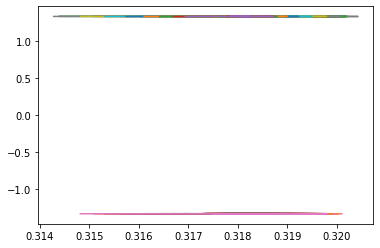

(0.3540881482417355+1.3192684179342826j) 0.089422950038603


In [57]:
plt.clf()
l=[]
for xi in np.linspace(-1.5,1.5,15):
    for yi in np.linspace(-1.5,1.5,15):
        l += [[xi + yi*1j]]
        for _ in range(30):
            l[-1] += [np.log(l[-1][-1])]
        plt.plot( [li.real for li in l[-1][-10:]], [li.imag for li in l[-1][-10:] ] )
plt.show()
print(np.mean(l[-1]), np.var(l[-1]))

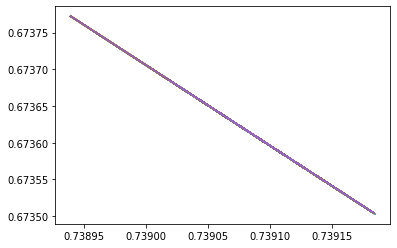

(0.7461407789901293+0.6928076247275123j) 0.07619475885387703


In [42]:
plt.clf()
l=[]
def nrm(x): return (x.real**2+x.imag**2)**.5
for xi in np.linspace(-1.5,1.5,15):
    for yi in np.linspace(-1.5,1.5,15):
        l += [[xi + yi*1j]]
        for _ in range(30):
            l[-1] += [np.exp(1j*l[-1][-1])]
            l[-1][-1] /= nrm(l[-1][-1])
        #plt.plot( [li.real for li in l[-1]], [li.imag for li in l[-1] ] )
        plt.plot( [li.real for li in l[-1][-10:]], [li.imag for li in l[-1][-10:] ] )
plt.show()
print(np.mean(l[-1]), np.var(l[-1]))

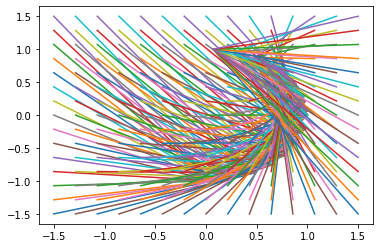

(0.7461407789901293+0.6928076247275123j) 0.07619475885387703


In [58]:
plt.clf()
l=[]
def nrm(x): return (x.real**2+x.imag**2)**.5
for xi in np.linspace(-1.5,1.5,15):
    for yi in np.linspace(-1.5,1.5,15):
        l += [[xi + yi*1j]]
        for _ in range(30):
            l[-1] += [np.exp(1j*l[-1][-1])]
            l[-1][-1] /= nrm(l[-1][-1])
        plt.plot( [li.real for li in l[-1]], [li.imag for li in l[-1] ] )
plt.show()
print(np.mean(l[-1]), np.var(l[-1]))

In [1]:
l=[]
def nrm(x): return (x.real**2+x.imag**2)**.5
for xi in np.random.uniform(-2,2,300):
    for yi in np.random.uniform(-2,2,300):
        l += [[xi + yi*1j]]
        for _ in range(70):
            l[-1] += [np.exp(1j*l[-1][-1])]
            l[-1][-1] /= nrm(l[-1][-1])

print(np.mean(l[-1]), np.var(l[-1]))

NameError: name 'np' is not defined

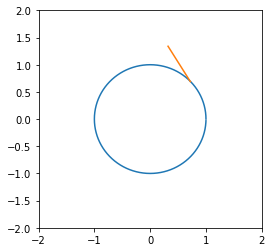

In [7]:
plt.figure(figsize=(4, 4))
plt.xlim([-2, 2])
plt.ylim([-2, 2]) 
plot_me([n_circle_rotations], Max=1.0, show=False)
plt.plot([0.32,0.72], [1.34,0.69])


In [49]:
# what are the solutions to log(x)=1?

PLOTTING=False
func = lambda x: np.log(x+0j)
n = 50
resolution=707
window_width = 3
value_width = 3


'''params_sets = [ (0.1, np.exp(1j*2*np.pi*x/n + 0.1)) for x in range(n)]'''
# ^ radius, locus. 
radius, locus = 0.05, 1+0j

if PLOTTING: 
    plt.figure(figsize=(11, 11))
    plt.xlim([-window_width, window_width])
    plt.ylim([-window_width, window_width])   

grid1 = np.linspace(-value_width,value_width,resolution)
grid2 = np.linspace(-value_width,value_width,resolution)

solutions_r, solutions_i = [],[]
for r in np.random.permutation(grid1):
    for i in np.random.permutation(grid2):
        mapped = func(r+1j*i)
        if abs(mapped - locus)>radius: continue
        solutions_r += [r]; solutions_i += [i] 
        if PLOTTING: 
            angle = (np.angle( (r+i*1j) )/(2*np.pi))
    #             _clr = hsv_to_rgb( ((angle)%1, .6,min(0.99, 1-abs(r+i*1j)/4)) )
            _clr = hsv_to_rgb( ((angle)%1, 0.7, 0.7) )
            _clr = (_clr[0], _clr[1], _clr[2], 0.4)

            plt.plot( [r, mapped.real], [i, mapped.imag], color=_clr)

            if np.random.rand()<0.2: plt.scatter([r],[i],color=(.5,.5,.5,1), marker='1')
            if np.random.rand()<0.2: plt.scatter([mapped.real],[mapped.imag],color=(.5,.5,.5,1), marker='2')
print('coordinate-wise mean of solutions: '+str(np.mean(solutions_r))+', '+str(np.mean(solutions_i)))
print('coordinate-wise max of solutions: ' +str(np.max(solutions_r)) +', '+str(np.max(solutions_i)))
print('coordinate-wise min of solutions: ' +str(np.min(solutions_r)) +', '+str(np.min(solutions_i)))

if PLOTTING:
    
    # plot unit circle
    for t in range(resolution):
        xy=[np.sin(t*1.8*np.pi/resolution).real],[np.cos(t*1.8*np.pi/resolution)]
        c = hsv_to_rgb( (t/float(resolution),0.3,.7))
        c = (c[0],c[1],c[2],1-0.3)
        #plt.scatter([np.exp(1j*t*2*np.pi/resolution).real], [np.exp(1j*t*2*np.pi/resolution).imag],
        plt.scatter([np.exp(1j*t*2*np.pi/resolution).real], [np.exp(1j*t*2*np.pi/resolution).imag],
                   color=c, marker='.')

    #plot_me([angle_to_complex], show=None, c='rainbow')
    plt.scatter( [0],[0],color='black')

    plt.show()

coordinate-wise mean of solutions: 2.7217720571093516, 2.9735150335347085e-16
coordinate-wise max of solutions: 2.855524079320114, 0.13597733711048177
coordinate-wise min of solutions: 2.592067988668556, -0.13597733711048132


In [51]:
/np.e

-0.04923773839290317